In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from mpl_toolkits import mplot3d

%matplotlib inline

In [2]:
boston = load_wine()

In [3]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=['TARGET'])

In [4]:
data = pd.concat([features, target], axis=1)

In [5]:
print(boston.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [6]:
data2 = data.corr('pearson')

print()

In [7]:
abs(data2['TARGET']).sort_values(ascending=False)

TARGET                          1.000000
flavanoids                      0.847498
od280/od315_of_diluted_wines    0.788230
total_phenols                   0.719163
proline                         0.633717
hue                             0.617369
alcalinity_of_ash               0.517859
proanthocyanins                 0.499130
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
alcohol                         0.328222
color_intensity                 0.265668
magnesium                       0.209179
ash                             0.049643
Name: TARGET, dtype: float64

In [9]:
X = data['flavanoids']
Y = data['TARGET']

In [10]:
X = np.array(X/X.mean())
Y = np.array(Y/Y.mean())

In [11]:
n = int(0.8 * len(X))

In [12]:
x_train = X[:n]
y_train = Y[:n]

In [13]:
x_test = X[n:]
y_test = Y[n:]

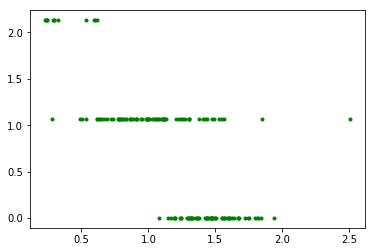

In [14]:
plt.plot(x_train, y_train, 'g.')

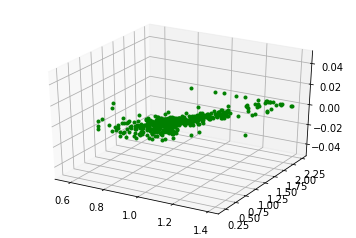

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(X, Y, 'g.')

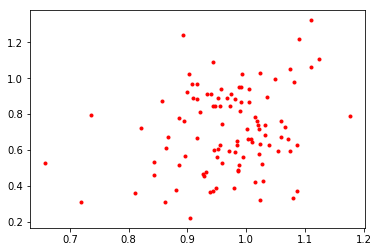

In [15]:
plt.plot(x_test, y_test, 'r.')


In [17]:
def hypothesis(a,b,x):
    return a * x  + b

In [22]:
def error(a,b,x,y):
    e = 0
    m = len(y)
#     for i in range(m):
    e = np.power(np.dot(hypothesis(a,b,x),y), 2)
#         e += np.power((hypothesis(a,b,x[i]) - y[i]), 2)
    
    return (1/(2 * m)) * e

In [23]:
def step_gradient(a,b,x,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        grad_a += 1/m * (hypothesis(a,b,x[i]) - y[i]) * x[i]
        grad_b += 1/m * (hypothesis(a,b,x[i]) - y[i])
    
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    
    return a, b

In [36]:
def descend(initial_a, initial_b, x, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    for i in range(iterations):
        e = error(a, b, x ,y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}")
        
        a, b = step_gradient(a, b, x, y, learning_rate)

    return a, b

In [37]:
# def descend(initial_a, initial_b, x, y, learning_rate):
#     a = initial_a
#     b = initial_b
#     i = 0
#     while True:
#         e = error(a, b, x ,y)
#         if i % 1000 == 0:
#             print(f"Error: {e}, a: {a}, b: {b}")
        
#         a, b = step_gradient(a, b, x, y, learning_rate)
#         e1 = error(a, b, x, y)
#         if (e1 > e):
#             break
#         i +=1
#     return a, b, i

In [38]:
a = 0
b = 1
learning_rate = 0.01
iterations = 1000000

final_a, final_b = descend(a, b, x_train, y_train, learning_rate, iterations)
# final_a, final_b, iters = descend(a, b, x_train, y_train, learning_rate)

Error: 232.53077924752267, a: 0, b: 1
Error: 279.5521482405895, a: 0.21314461782342037, b: 0.8745784354256118
Error: 281.6738528086371, a: 0.37003145582037533, b: 0.7154166649597727
Error: 283.66550846738807, a: 0.5167652148513465, b: 0.5665551977359419
Error: 285.5346223371763, a: 0.6540029610039395, b: 0.42732744002236356
Error: 287.2883295177362, a: 0.782359237660549, b: 0.29710993726992707
Error: 288.93340296135216, a: 0.9024088174520268, b: 0.1753195823755791
Error: 290.47626443439054, a: 1.0146892760591748, b: 0.061411004559502984
Error: 291.92299633188617, a: 1.1197033994482735, b: -0.04512587277644767
Error: 293.27935409428295, a: 1.217921435320088, b: -0.1447681161448278
Error: 294.55077901619893, a: 1.3097831988542552, b: -0.23796191825125584
Error: 295.7424112720851, a: 1.3957000421784318, b: -0.3251245960217983
Error: 296.85910301377976, a: 1.476056696381417, b: -0.40664645932613547
Error: 297.90543142070663, a: 1.5512129943186435, b: -0.48289255876454446
Error: 298.8857116

Error: 313.2213615786823, a: 2.6365923261314475, b: -1.5840103989608971
Error: 313.2220923504353, a: 2.636643471998002, b: -1.584062286466458
Error: 313.2227758303798, a: 2.6366913079118177, b: -1.5841108160234165
Error: 313.22341507895385, a: 2.636736048079594, b: -1.584156204944568
Error: 313.22401295854627, a: 2.6367778928454366, b: -1.5841986564791042
Error: 313.22457214631623, a: 2.6368170295879985, b: -1.5842383607227541
Error: 313.2250951461779, a: 2.636853633559551, b: -1.5842754954690277
Error: 313.22558430000726, a: 2.63688786867074, b: -1.5843102270053548
Error: 313.22604179813356, a: 2.6369198882245923, b: -1.5843427108577266
Error: 313.2264696891418, a: 2.636949835602976, b: -1.5843730924871153
Error: 313.2268698890461, a: 2.6369778449086727, b: -1.5844015079408564
Error: 313.22724418987053, a: 2.6370040415658735, b: -1.5844280844618484
Error: 313.22759426766646, a: 2.637028542881823, b: -1.5844529410583503
Error: 313.2279216900295, a: 2.637051458572128, b: -1.584476189036

In [39]:
print(error(a,b,x_train,y_train))
print(error(final_a, final_b, x_train, y_train))
print(error(final_a, final_b, x_test, y_test))

232.53077924752267
313.23265366423107
25.256740533467642


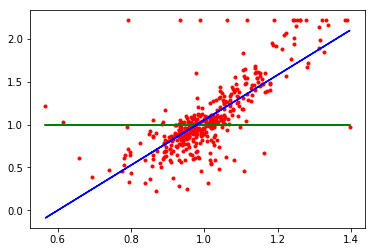

In [40]:
plt.plot(x_train, y_train, 'r.', x_train, hypothesis(a, b, x_train), 'g', x_train, hypothesis(final_a, final_b, x_train), 'b', )

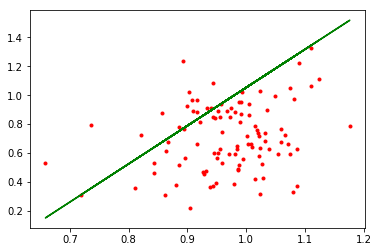

In [41]:
plt.plot(x_test, y_test, 'r.', x_test, hypothesis(final_a, final_b, x_test), 'g')